In [ ]:
import librosa
import pydub
import matplotlib.pyplot as plt
import numpy as np

Z ```IPython``` dodamy widget, aby móc odtwarzać audio a następnie załadujemy przykładowy plik z ```librosa```.

In [ ]:
from IPython.display import Audio
#sampling_rate=number of samples per second of audi
#waveform saved as one-dimensional NumPy floating point array
filename = librosa.example('nutcracker')
waveform, sampling_rate = librosa.load(filename)
Audio(data=waveform, rate=sampling_rate)

## Obliczanie tempa utworu (Beat Tracking)

Z użyciem biblioteki ```librosa``` wyznaczyć możemy tempo melodii oraz dokładne czasy (klatki) w których wybijany jest rytm. Typowo:
- Wolne tempo: Balady, piosenki klasyczne, jazz, gdzie BPM wynosi około 60-80.
- Średnie tempo: Wiele utworów pop, rock, gdzie BPM wynosi 100-120.

In [ ]:
#OPENS EXAMPLE
tempo, beat_frames = librosa.beat.beat_track(y=waveform, sr=sampling_rate)             
print(f'Oszacowane tempo: {tempo} BPM')
beat_times = librosa.frames_to_time(beat_frames, sr=sampling_rate)
print(f"Sekundy w których jest wybijane: {beat_times}")

Jeśli mamy wątpliwości co do tego czy nasze tempo zostało wyznaczone poprawnie możemy wykorzystać funkcję jego dynamicznego śledzenia - ```librosa.feature.tempo```. Parametr ```aggregate=None``` sprawia, że tempo wyznaczane jest osobno dla każdej klatki, a ```std_bpm``` informuje o odchyleniu standardowym BPM'ów.

In [ ]:
tempo_dynamic = librosa.feature.tempo(y=waveform, sr=sampling_rate, aggregate=None, std_bpm=1)

fig, ax = plt.subplots()
times = librosa.times_like(tempo_dynamic, sr=sampling_rate)
ax.plot(times, tempo_dynamic, label='Dynamic tempo estimate')
ax.axhline(tempo, label='Static tempo estimate', color='r')
ax.legend()
ax.set(xlabel='Time (s)', ylabel='Tempo (BPM)')

Wyświetlić możemy również wykres na tle waveformu

In [ ]:
librosa.display.waveshow(waveform, sr=sampling_rate) #wyświetlanie fali dźwiękowej
plt.vlines(librosa.frames_to_time(beat_frames), ymin=-1, ymax=1, color='r', alpha=0.7, label='Beats')
plt.title(f'Tempo: {tempo[0]:.2f} BPM')
plt.legend()
plt.show()

## Zmiana tempa i wysokości (pitch shifting) - manipulacja dźwiękiem:

In [ ]:
filename = 'Hall_Of_Fame_(Official Instrumental).mp3'
y, sr = librosa.load(filename)
Audio(data=y, rate=sr)

Zmiana tempa zmienia szybkość odtwarzania dźwięku (przyspiesza lub spowalnia) bez zmiany wysokości dźwięku (tonu).

In [ ]:
# Zwiększanie tempa o 50% (rate = 1.5) 
y_fast = librosa.effects.time_stretch(y, rate=1.5)
Audio(data=y_fast, rate=sr)

In [ ]:
# Zmniejszanie tempa o 50% (rate = 1.5) 
y_slow = librosa.effects.time_stretch(y, rate=0.5)
Audio(data=y_slow, rate=sr)

### Wykresy

In [ ]:
librosa.display.waveshow(y_fast, sr=sr)
plt.title('Przyspieszone tempo')
plt.show()

librosa.display.waveshow(y_slow, sr=sr)
plt.title('Spowolnione tempo')
plt.show()

### Zmiana wysokości dźwięku (tonu)

In [ ]:
y_pitched_up = librosa.effects.pitch_shift(y, sr=sr, n_steps=4)
Audio(data=y_pitched_up, rate=sr)

In [ ]:
y_pitched_down = librosa.effects.pitch_shift(y, sr=sr, n_steps=-4)
Audio(data=y_pitched_down, rate=sr)

Ton wyższy odpowiada wyższej częstotliwości (więcej drgań na sekundę).
Ton niższy odpowiada niższej częstotliwości (mniej drgań na sekundę).

In [ ]:
librosa.display.waveshow(y_pitched_up, sr=sr)
plt.title('Zwiększony ton')
plt.show()

librosa.display.waveshow(y_pitched_down, sr=sr)
plt.title('Zmniejszony ton')
plt.show()

## Obliczanie spektrum chromatycznego (Chroma)

Chromagram to narzędzie, które analizuje, jakie dźwięki (o jakich częstotliwościach) są obecne w danym momencie w utworze. Chromagram będzie pokazywał, w którym momencie utworu pojawiają się określone dźwięki o określonych częstotliwościach i jak intensywnie są obecne.

In [ ]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Chromagram (spektrum chromatyczne)')
plt.show()

## Wykrywanie tonacji (Tonality)

Chromagram CQT jest bardziej zaawansowaną wersją zwykłego chromagramu i wykorzystuje transformatę CQT (constant-Q transform), która lepiej odwzorowuje muzyczne tonacje i akordy.

In [ ]:
chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma_cqt, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Chromagram CQT')
plt.show()

In [ ]:
y_louder = y * 5  # Podnosi głośność 5 razy
# Znormalizowanie do zakresu [-1, 1], aby zapobiec przesterowaniu
y_louder = np.clip(y_louder, -1.0, 1.0)
Audio(data=y_louder, rate=sr)

## Zmiana głośności (Gain)

In [ ]:
y_quieter = y * 0.1  # Zmniejszenie głośności

# Przycinanie do zakresu [-1, 1], aby uniknąć zniekształceń
y_quieter = np.clip(y_quieter, -1.0, 1.0)
Audio(data=y_quieter, rate=sr)

In [ ]:
plt.figure(figsize=(10, 6))
librosa.display.waveshow(y_louder, sr=sr)
plt.title('Zwiększona głośność')
plt.show()

plt.figure(figsize=(10, 6))
librosa.display.waveshow(y_quieter, sr=sr)
plt.title('Zmniejszona głośność')
plt.show()


## Dodanie efektu reverb (Reverb)

Dodanie pogłosu do dźwięku, co sprawia, że dźwięk staje się bardziej przestrzenny i pełny. Dodanie pogłosu.

In [ ]:
y_reverb = librosa.effects.preemphasis(y)
Audio(data=y_reverb, rate=sr)

In [ ]:
Audio(data=y, rate=sr)

## Usunięcie ciszy na początku i na końcu audio )


Usuwa ciszę na początku i końcu pliku audio.

In [ ]:
y_trimmed, _ = librosa.effects.trim(y)
Audio(data=y_trimmed, rate=sr)

In [ ]:
Audio(data=y, rate=sr)

## Wykrywanie transjentów (transient detection)

Transjenty to krótkotrwałe zmiany w dźwięku, np. uderzenia bębna czy inne nagłe zmiany w głośności..
Metoda ta wykrywa momenty, w których następuje nagła zmiana w dźwięku (np. uderzenie w perkusję).

In [ ]:
transients = librosa.onset.onset_detect(y=y, sr=sr, units='time')
plt.figure(figsize=(10, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.vlines(transients, ymin=-1, ymax=1, color='r', alpha=0.6, label='Transjenty')
plt.title('Wykrywanie transjentów')
plt.legend()
plt.show()

## Rodzielanie ścieżek

Będziemy chcieli oddzielić ścieżkę perkusyjną od melodii, w tym celu najpierw zastosujemy krótkoczasową transformatę Fouriera. Przeprowadza ona zasadniczo klasyczną tranformację w małych oknach czasowych wyznaczonych na całym naszym sygnale. W jej efekcie dostajemy informację o natężeniu w różnych częstotliwościach na naszym sygnale. 

In [ ]:
D = librosa.stft(waveform)
D_harmonic, D_percussive = librosa.decompose.hpss(D)

Wyświetlimy teraz historiogramy

In [ ]:
rp = np.max(np.abs(D))

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)

img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Full spectrogram')
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Harmonic spectrogram')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Percussive spectrogram')
fig.colorbar(img, ax=ax)

Odtwórzmy warstwę melodyczną. W tym celu musimy wrócić z przetransformowanego sygnału do normalnego - wykonać odwrotną krótkoczasową transformację Fouriera. Działanie to wykonuje funkcja ``` librosa.istft ```.

In [ ]:
y_harmonic = librosa.istft(D_harmonic, length=len(waveform))
Audio(data=y_harmonic, rate=sampling_rate)

Oraz perkusyjną

In [ ]:
y_percussive = librosa.istft(D_percussive, length=len(waveform))
Audio(data=y_percussive, rate=sampling_rate)

Domyślna funkcja stft stara się przypisać sygnały jednoznacznie do jednej albo drugiej warstwy, co sprawia że nie najlepiej radzi sobie z szumami i dźwiękami, które nie należą jednoznacznie do żadnej grupy. W tym celu zastosować możemy pewien margines ```margin``` (domyślnie ```margin=1```.

In [ ]:
D_harmonic2, D_percussive2 = librosa.decompose.hpss(D, margin=2)
D_harmonic4, D_percussive4 = librosa.decompose.hpss(D, margin=4)
D_harmonic8, D_percussive8 = librosa.decompose.hpss(D, margin=8)
D_harmonic16, D_percussive16 = librosa.decompose.hpss(D, margin=16)

Wyświetlając spektrogramy:

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(10, 10))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[0, 0])
ax[0, 0].set(title='Harmonic')

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[0, 1])
ax[0, 1].set(title='Percussive')

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic2), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[1, 0])

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive2), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[1, 1])

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic4), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[2, 0])

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive4), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[2, 1])

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic8), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[3, 0])

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive8), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[3, 1])

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic16), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[4, 0])

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive16), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[4, 1])

for i in range(5):
    ax[i, 0].set(ylabel='margin={:d}'.format(2**i))
    ax[i, 0].label_outer()
    ax[i, 1].label_outer()

Zmiany są wyraźnie widoczne na spektrogramach. Odsłuchać możemy dla przykładu ```margin=8```. W sytuacji gdzie ścieżka perkusyjna jest mocniej zarysowana różnicę będą bardziej widoczne.

In [ ]:
y_harmonic8 = librosa.istft(D_harmonic8, length=len(waveform))
Audio(data=y_harmonic8, rate=sampling_rate)

In [ ]:
y_percussive8 = librosa.istft(D_percussive8, length=len(waveform))
Audio(data=y_percussive8, rate=sampling_rate)

Inną funkcjonalnością, która może się przydać jest oddzielanie wokalu. Obliczamy spektrogram oraz odtworzymy analizowany fragment dźwięku

In [ ]:
waveform2, sampling_rate = librosa.load(librosa.ex('fishin'), duration=120)
S_full, phase = librosa.magphase(librosa.stft(waveform2))
Audio(data=waveform2[10*sampling_rate:15*sampling_rate], rate=sampling_rate)

In [ ]:
idx = slice(*librosa.time_to_frames([10, 15], sr=sampling_rate))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sampling_rate, ax=ax)
fig.colorbar(img, ax=ax)

Przeprowadzamy analizę podobieństwa sygnałów - jako metrykę wykorzystamy funkcję cos, poszukjemy sygnałóœ podobnych oddzielonych o minimum 2 sekundy (aby uniknąć lokalnego podobieństwa). Tym sposobem oddzialamy powtarzalne dźwięki (melodię)

In [ ]:
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sampling_rate)))

# upewniamy się, że filtr nie jest większy niż pełny sygnał
S_filter = np.minimum(S_full, S_filter)

Jak poprzednio możemy zmiękczyć nasz rodział wprowadzając pewien margines

In [ ]:
# Note: the margins need not be equal for foreground and background separation
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)

#mnożymy sygnał i zmiękczającą maskę

S_foreground = mask_v * S_full
S_background = mask_i * S_full

Narysujmy nasze spektrogramy

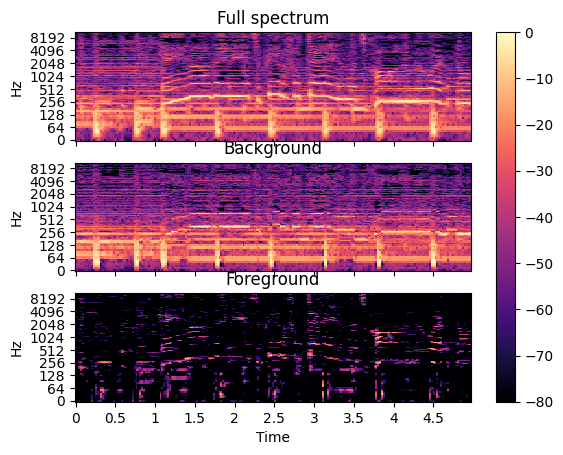

In [36]:
# sphinx_gallery_thumbnail_number = 2

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sampling_rate, ax=ax[0])
ax[0].set(title='Full spectrum')
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sampling_rate, ax=ax[1])
ax[1].set(title='Background')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sampling_rate, ax=ax[2])
ax[2].set(title='Foreground')
fig.colorbar(img, ax=ax)

Odtwórzmy warstwę z wokalem

In [37]:
y_foreground = librosa.istft(S_foreground * phase)
# Play back a 5-second excerpt with vocals
Audio(data=y_foreground[10*sampling_rate:15*sampling_rate], rate=sampling_rate)

oraz warstwę z tłem

In [38]:
y_background = librosa.istft(S_background*phase)
Audio(data=y_background[10*sampling_rate:15*sampling_rate], rate=sampling_rate)

Rozdział nie jest idealny - w praktyce kluczowe jest dobranie odpowiednich wartości filtrów dla każdego indywidualnego przypadku. Możemy również zastosować wielokrotne rodzielanie, aby wyodrębnić nasz sygnał stopniowo.